# IMPORTING ALL USEFUL LIBRARIES

In [19]:
# Load libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import SVC
from sklearn.svm import SVC

# Import Naive bayes
from sklearn.naive_bayes import MultinomialNB

# Import SGD Classifier
from sklearn.linear_model import SGDClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Import train_test_split function
from sklearn.model_selection import train_test_split, GridSearchCV 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Import classification_report
from sklearn.metrics import classification_report

from sklearn_evaluation.plot import confusion_matrix

# LOADING DATASET USED

In [2]:
# load dataset
data = pd.read_csv("data.csv")
data.head()

,ID Number,Case,Section (IPC),Judgment Date,Chapter
0,1,The deceased in her\nstatement stated that the...,302,14-Mar-19,Sixteen
1,2,additionally respondent Makrand Singh for caus...,302,14-Jan-19,Sixteen
2,3,"Ms. Kailashi was\nreturning from the farm, in ...",304,10-Apr-19,Sixteen
3,4,"When they reached near Advocate Mishra’s lane,...",294,19-Feb-19,Fourteen
4,5,It was stated that seven named persons includi...,452,11-Apr-19,Seventeen


In [3]:
# unique category labels
data['Chapter'].unique() 

array(['Sixteen', 'Fourteen', 'Seventeen', 'Twenty', 'Eight', 'Four',
       'Ten', 'Nine', 'Eleven', 'Five', 'Fifteen'], dtype=object)

# REPRESENTING FREQUENCY OF CHAPTERS

(-1.1142375321128322,
 1.1006779792841213,
 -1.105451164586582,
 1.1088341058560176)

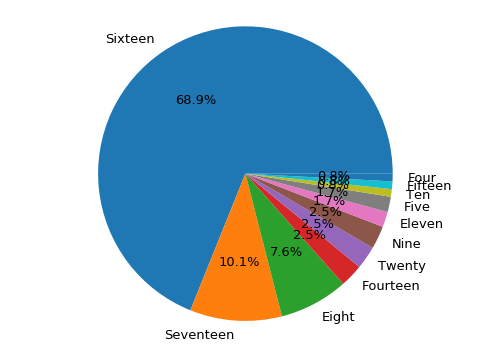

In [4]:
data.Chapter.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [5]:
#Lower Case and removing all puntuation marks from the "Case"
data['Case'] = data['Case'].str.replace('[^\w\s]','').str.lower() 

# CREATING DATAFRAME FOR EACH CHAPTER

In [ ]:
# create dataframe for each Chapter
IPC_14 = data.loc[data['Chapter'] == 'Fourteen'] 
IPC_16 = data.loc[data['Chapter'] == 'Sixteen'] 
IPC_17 = data.loc[data['Chapter'] == 'Seventeen'] 
IPC_20 = data.loc[data['Chapter'] == 'Twenty'] 
IPC_8 = data.loc[data['Chapter'] == 'Eight'] 
IPC_4 = data.loc[data['Chapter'] == 'Four'] 
IPC_10 = data.loc[data['Chapter'] == 'Ten'] 
IPC_9 = data.loc[data['Chapter'] == 'Nine'] 
IPC_5 = data.loc[data['Chapter'] == 'Five'] 
IPC_11 = data.loc[data['Chapter'] == 'Eleven'] 
IPC_15 = data.loc[data['Chapter'] == 'Fifteen'] 
 
Case_14 = IPC_14['Case'].to_string()
Case_16 = IPC_16['Case'].to_string()
Case_17 = IPC_17['Case'].to_string()
Case_20 = IPC_20['Case'].to_string()
Case_8 = IPC_8['Case'].to_string()
Case_4 = IPC_4['Case'].to_string()
Case_10 = IPC_10['Case'].to_string()
Case_9 = IPC_9['Case'].to_string()
Case_5 = IPC_5['Case'].to_string()
Case_11 = IPC_11['Case'].to_string()
Case_15 = IPC_15['Case'].to_string()

# 1. NAVE BAYES

In [16]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])

y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# fit and score the bayesian classifier
mnb = MultinomialNB(alpha=1)


mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

      Eight       0.00      0.00      0.00         3
     Eleven       0.00      0.00      0.00         2
    Fifteen       0.00      0.00      0.00         0
       Five       0.00      0.00      0.00         1
       Four       0.00      0.00      0.00         0
   Fourteen       0.00      0.00      0.00         3
       Nine       0.00      0.00      0.00         2
  Seventeen       0.75      0.43      0.55         7
    Sixteen       0.76      0.78      0.77        40
        Ten       0.00      0.00      0.00         1
     Twenty       0.00      0.00      0.00         1

avg / total       0.59      0.57      0.57        60

Accuracy: 0.5666666666666667


E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\python\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# CONFUSION MATRIX

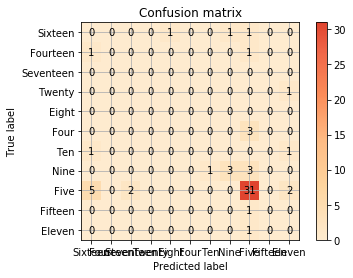

In [17]:
#Confusion Matrix
confusion_matrix(y_test, mnb.predict(X_test), target_names = ['Sixteen', 'Fourteen', 'Seventeen', 'Twenty', 'Eight', 'Four', 'Ten', 'Nine', 'Five', 'Fifteen', 'Eleven']).grid(True)

# 2. SGD CLASSIFIER

In [23]:
# Now I am gone use SGD Classifier 
sgd = SGDClassifier(n_jobs=-1, n_iter=10, random_state=1234)

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]

# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=3, refit=True)
sgd_search.fit(X_train, y_train)
y_pred = mnb.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

E:\python\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
E:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: Deprecati

             precision    recall  f1-score   support

      Eight       0.00      0.00      0.00         1
       Four       0.50      1.00      0.67         1
       Nine       1.00      1.00      1.00         1
  Seventeen       1.00      0.80      0.89         5
    Sixteen       0.86      0.86      0.86        14
        Ten       0.00      0.00      0.00         1
     Twenty       1.00      1.00      1.00         1

avg / total       0.81      0.79      0.80        24

Accuracy: 0.7916666666666666


E:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 3. DECISION TREE CLASSIFIER

In [24]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

      Eight       0.00      0.00      0.00         5
     Eleven       0.00      0.00      0.00         1
    Fifteen       0.00      0.00      0.00         1
       Five       0.00      0.00      0.00         0
       Four       0.00      0.00      0.00         1
   Fourteen       0.00      0.00      0.00         1
  Seventeen       0.00      0.00      0.00         6
    Sixteen       0.72      0.88      0.79        43
        Ten       0.00      0.00      0.00         1
     Twenty       0.00      0.00      0.00         1

avg / total       0.51      0.63      0.57        60

Accuracy: 0.6333333333333333


E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\python\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 4. SUPPORT VECTOR MACHINE

In [25]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create SVC object
svc=SVC(kernel='linear')

# SVC Classifer
svc.fit(X_train,y_train)


#Predict the response for test dataset
y_pred=svc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

      Eight       0.00      0.00      0.00         6
     Eleven       0.00      0.00      0.00         1
    Fifteen       0.00      0.00      0.00         1
       Five       0.00      0.00      0.00         1
       Four       0.00      0.00      0.00         1
   Fourteen       0.00      0.00      0.00         1
       Nine       0.00      0.00      0.00         1
  Seventeen       0.00      0.00      0.00         9
    Sixteen       0.63      1.00      0.78        38
     Twenty       0.00      0.00      0.00         1

avg / total       0.40      0.63      0.49        60

Accuracy: 0.6333333333333333


E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 5. Random Forest Classifier

In [26]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create Random Forest Classifier object
clf=RandomForestClassifier(n_estimators=100)

# Train Random Forest Classifier
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

      Eight       0.50      0.17      0.25         6
       Four       0.00      0.00      0.00         1
   Fourteen       0.00      0.00      0.00         3
       Nine       0.00      0.00      0.00         2
  Seventeen       0.00      0.00      0.00         7
    Sixteen       0.69      0.98      0.81        41

avg / total       0.52      0.68      0.58        60

Accuracy: 0.6833333333333333


E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 6. K NEIGHBORS CLASSIFIER

In [27]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create K Neighbors Classifier object
classifier = KNeighborsClassifier(n_neighbors=5)

# Train K Neighbors Classifer
classifier = classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

      Eight       0.00      0.00      0.00         5
     Eleven       0.00      0.00      0.00         1
    Fifteen       0.00      0.00      0.00         1
       Five       0.00      0.00      0.00         1
   Fourteen       0.00      0.00      0.00         2
       Nine       0.00      0.00      0.00         1
  Seventeen       0.11      0.57      0.18         7
    Sixteen       0.73      0.40      0.52        40
        Ten       0.00      0.00      0.00         1
     Twenty       0.00      0.00      0.00         1

avg / total       0.50      0.33      0.36        60

Accuracy: 0.3333333333333333


E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 7. LOGISTIC REGRESSION

In [28]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Case'])
y = data['Chapter']

#I will split data 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

# Create Logistic Regression Classifier object
logreg = LogisticRegression()

# Train Logistic Regression Classifer
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=logreg.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

      Eight       1.00      0.25      0.40         4
       Five       0.00      0.00      0.00         2
   Fourteen       0.00      0.00      0.00         1
       Nine       0.00      0.00      0.00         1
  Seventeen       0.33      0.17      0.22         6
    Sixteen       0.77      1.00      0.87        43
     Twenty       0.00      0.00      0.00         3

avg / total       0.65      0.75      0.67        60

Accuracy: 0.75


E:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# CASE CHAPTER FUNCTION

In [29]:
# Case Chapter function
def Case1(Case2):
    Chapter = {'Fourteen' : 'This case is comes under the 14th Chapter Of IPC', 
                  'Eleven' : 'This case is comes under the 11th Chapter of IPC', 
                  'Sixteen' : 'This case comes under the 16th Chapter of IPC',
                  'Seventeen' : 'This case is comes under the 17th Chapter of IPC', 
                  'Twenty' : 'This case comes under the 20th Chapter of IPC', 
                   'Five' : 'This case is comes underr the 5th Chapter of IPC', 
                  'Four' : 'This case comes under the 4th Chapter of IPC', 
                   'Eight' : 'This case is comes underr the 8th Chapter of IPC', 
                  'Ten' : 'This case comes under the 10th Chapter of IPC', 
                   'Nine' : 'This case is comes underr the 9th Chapter of IPC', 
                  'Fifteen' : 'This case comes under the 15th Chapter of IPC'}
               
    pridicter = sgd_search.best_estimator_.predict(vectorizer.transform([Case2]))
    return Chapter[pridicter[0]]

In [30]:
Case1("additionally respondent Makrand Singh for causing the death of three people, viz. Premchand Jain, his wife Anandi Devi and unmarried daughter Preeti, and for committing robbery of Rs. 30,000/in cash and about Rs. 8,00,000/worth of gold and silver.")

'This case comes under the 16th Chapter of IPC'